<a href="https://colab.research.google.com/github/ebtihel17/ebtihel17/blob/main/Python_For_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading and organizing Data**

In [ ]:
import yfinance as yf
data = yf.download("AAPL", start="2023-01-01", end="2023-11-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-01-03 00:00:00+00:00,123.768456,125.070000,130.899994,124.169998,130.279999,112117500
2023-01-04 00:00:00+00:00,125.045036,126.360001,128.660004,125.080002,126.889999,89113600
2023-01-05 00:00:00+00:00,123.718979,125.019997,127.769997,124.760002,127.129997,80962700
2023-01-06 00:00:00+00:00,128.271088,129.619995,130.289993,124.889999,126.010002,87754700
2023-01-09 00:00:00+00:00,128.795593,130.149994,133.410004,129.889999,130.470001,70790800


In [ ]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-10-25 00:00:00+00:00,170.041855,171.100006,173.059998,170.649994,171.880005,57157000
2023-10-26 00:00:00+00:00,165.857880,166.889999,171.380005,165.669998,170.369995,70625300
2023-10-27 00:00:00+00:00,167.179642,168.220001,168.960007,166.830002,166.910004,58499100
2023-10-30 00:00:00+00:00,169.236847,170.289993,171.169998,168.869995,169.020004,51131000
2023-10-31 00:00:00+00:00,169.713882,170.770004,170.899994,167.899994,169.350006,44846000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2023-01-03 00:00:00+00:00 to 2023-10-31 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  209 non-null    float64
 1   (Close, AAPL)      209 non-null    float64
 2   (High, AAPL)       209 non-null    float64
 3   (Low, AAPL)        209 non-null    float64
 4   (Open, AAPL)       209 non-null    float64
 5   (Volume, AAPL)     209 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.4 KB


In [ ]:
ticker=["AAPL","TSLA"]
Newdata = yf.download(ticker, start="2023-01-01", end="2023-11-01", interval="1d")["Adj Close"]
Newdata.head(3)

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,TSLA
Date,,
2023-01-03 00:00:00+00:00,123.768456,108.099998
2023-01-04 00:00:00+00:00,125.045036,113.639999
2023-01-05 00:00:00+00:00,123.718979,110.339996


#**Calculating and considering rates of return**

## **Calculating the return of a stock**

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [ ]:
''' loading data'''

import yfinance as yf
PG = yf.download("PG", start="2023-01-01", end="2023-11-01", interval="1d")
PG.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
2023-10-25 00:00:00+00:00,146.941833,150.600006,151.190002,149.119995,149.639999,6172900
2023-10-26 00:00:00+00:00,146.161255,149.800003,151.380005,149.740005,151.050003,7582100
2023-10-27 00:00:00+00:00,143.585373,147.160004,149.949997,146.279999,148.979996,8131800
2023-10-30 00:00:00+00:00,145.634354,149.259995,149.550003,147.539993,147.899994,5412800
2023-10-31 00:00:00+00:00,146.385666,150.029999,150.259995,148.639999,149.460007,6762100


- Calculating the simple daily returns for the stock prices of Procter & Gamble (PG): Measuring the percentage change in stock prices from one day to the next
and analyzing stock performance over time.

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [ ]:
'''Simple return'''

PG['simple_return'] = (PG['Close'] / PG['Close'].shift(1)) - 1
PG['simple_return']

,simple_return
Date,
2023-01-03 00:00:00+00:00,NaN
2023-01-04 00:00:00+00:00,0.004354
2023-01-05 00:00:00+00:00,-0.012415
2023-01-06 00:00:00+00:00,0.023813
2023-01-09 00:00:00+00:00,-0.012214
...,...
2023-10-25 00:00:00+00:00,0.004670
2023-10-26 00:00:00+00:00,-0.005312
2023-10-27 00:00:00+00:00,-0.017623


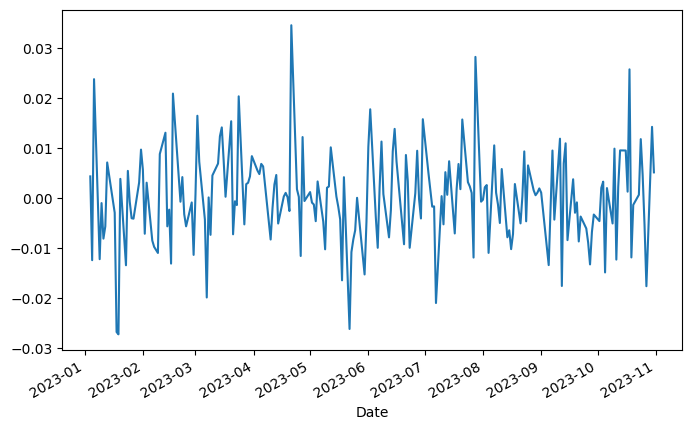

In [ ]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [ ]:
'''Average daily simple return '''

average=PG['simple_return'].mean()
average

-5.582417725536022e-06

In [ ]:
'''Average annual return'''

average_year=PG['simple_return'].mean()*250
average_year

-0.0013956044313840055

In [ ]:
print (str(round(average_year, 3)*100) +'%')

-0.1%


##**Calculaing the Return of a Portfolio**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Enable inline plots for visualization
%matplotlib inline

In [ ]:
# Define stock tickers
tickers =[ "F"    ,   "GE"      , "MSFT"     ,  "PG"]
start_date = '1995-01-01'
end_date = '2019-02-05'

# Downloading data
mydata = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
print(mydata.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6065 entries, 1995-01-03 00:00:00+00:00 to 2019-02-04 00:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       6065 non-null   float64
 1   GE      6065 non-null   float64
 2   MSFT    6065 non-null   float64
 3   PG      6065 non-null   float64
dtypes: float64(4)
memory usage: 236.9 KB
None


In [ ]:
print(mydata.tail())

Ticker                            F         GE        MSFT         PG
Date                                                                 
2019-01-29 00:00:00+00:00  6.582747  41.621311   97.220200  81.053574
2019-01-30 00:00:00+00:00  6.659201  42.556622  100.469048  81.902748
2019-01-31 00:00:00+00:00  6.728009  47.513771   98.627411  83.592445
2019-02-01 00:00:00+00:00  6.666847  47.654068   97.069077  84.458961
2019-02-04 00:00:00+00:00  6.651556  47.747601   99.864594  84.944229


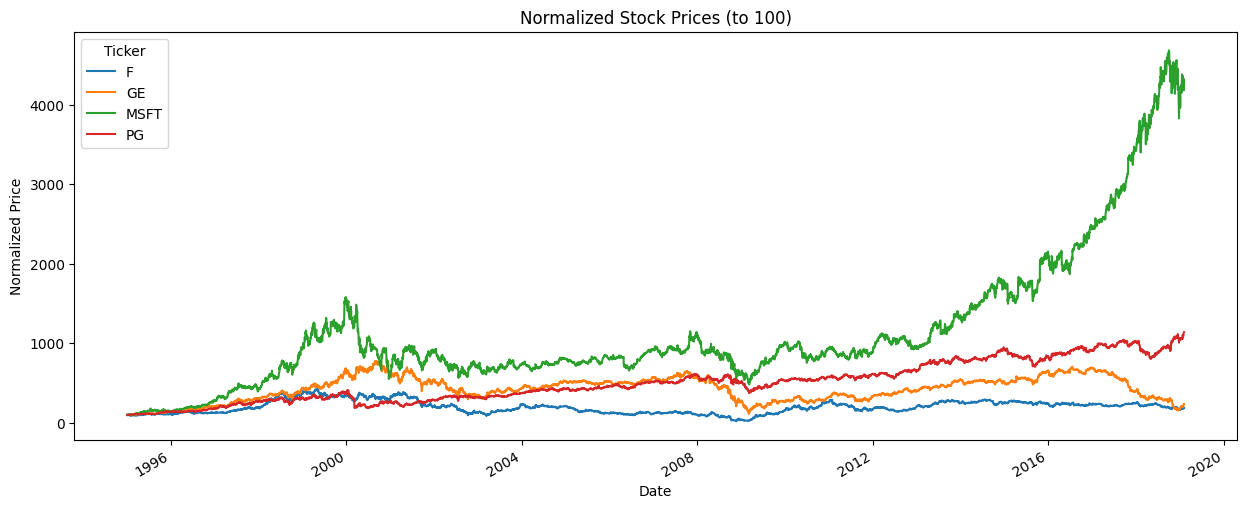

In [ ]:
# Normalize to 100 and plot
normalized_data = (mydata / mydata.iloc[0] * 100)
normalized_data.plot(figsize=(15, 6), title="Normalized Stock Prices (to 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.show()

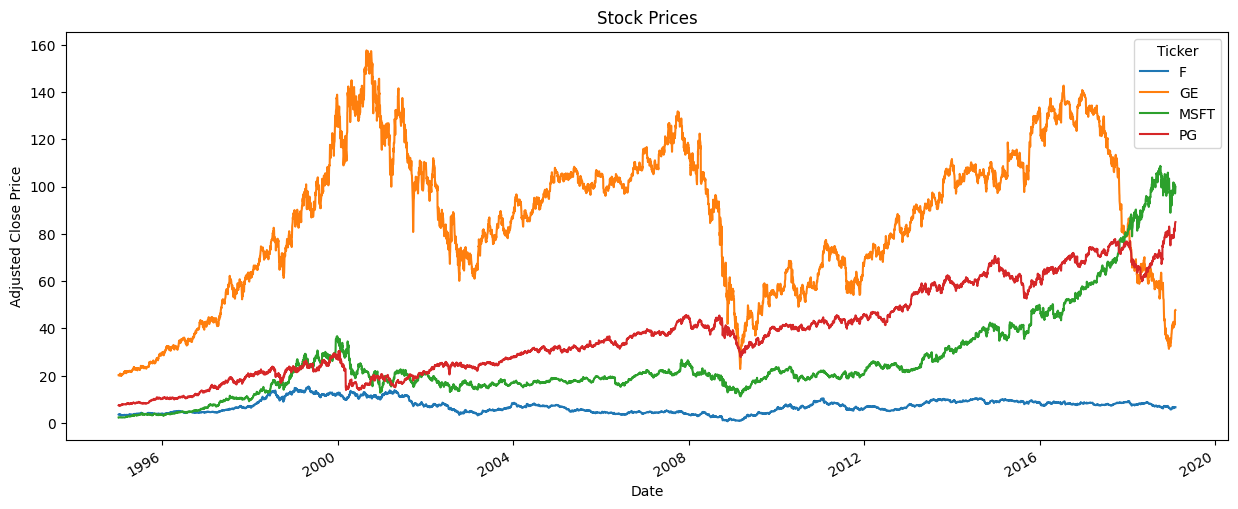

In [ ]:
# Plot raw stock prices
mydata.plot(figsize=(15, 6), title="Stock Prices")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()

In [ ]:
'''Calculating  daily returns'''

returns = mydata.pct_change()
print(returns.head())

Ticker                            F        GE      MSFT        PG
Date                                                             
1995-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN
1995-01-04 00:00:00+00:00  0.026906  0.000000  0.007269 -0.008017
1995-01-05 00:00:00+00:00 -0.008733  0.002451 -0.016495 -0.014141
1995-01-06 00:00:00+00:00  0.000000 -0.004890  0.016771  0.002049
1995-01-09 00:00:00+00:00  0.017621 -0.009828 -0.006185 -0.004090


In [ ]:
# Portfolio weights
weights_1 = np.array([0.25, 0.25, 0.25, 0.25])
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

# Calculate annualized returns
annual_returns = returns.mean() * 250
print("Annual Returns:")
print("Annual_Returns:")
# Portfolio returns
portfolio_1_return = np.dot(annual_returns, weights_1) * 100
portfolio_2_return = np.dot(annual_returns, weights_2) * 100

# Display portfolio returns
print(f"Portfolio 1 Annual Return: {portfolio_1_return:.2f}%")
print(f"Portfolio 2 Annual Return: {portfolio_2_return:.2f}%")

Annual Returns:
Ticker
F       0.103763
GE      0.079711
MSFT    0.204459
PG      0.125405
dtype: float64
Portfolio 1 Annual Return: 12.83%
Portfolio 2 Annual Return: 11.03%


# **Measuring investment risk**

* In finance, measuring investment risks involves understanding how volatile or uncertain the returns of an investment are.

* Key metrics and techniques in Python to measure risks include variance, standard deviation, Value at Risk (VaR), Sharpe Ratio, and Beta.

In [ ]:
'''Importing libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
'''Loading Data'''
'''AAPL	GOOGL	MSFT'''
# Define stock tickers and date range
tickers = ['DUK', 'MSFT', 'NEE']
start_date = '2015-01-01'
end_date = '2023-01-01'

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.tail(4)

[*********************100%***********************]  3 of 3 completed


Ticker,DUK,MSFT,NEE
Date,,,
2022-12-27 00:00:00+00:00,95.400276,233.134048,79.381760
2022-12-28 00:00:00+00:00,94.691704,230.743256,78.587959
2022-12-29 00:00:00+00:00,95.556717,237.118607,79.457367
2022-12-30 00:00:00+00:00,94.774529,235.947830,79.003769


In [ ]:
'''Calculating Returns'''

# daily percentage returns
returns = data.pct_change().dropna()

returns.tail(4)


Ticker,DUK,MSFT,NEE
Date,,,
2022-12-27 00:00:00+00:00,0.006602,-0.007414,-0.002020
2022-12-28 00:00:00+00:00,-0.007427,-0.010255,-0.010000
2022-12-29 00:00:00+00:00,0.009135,0.027630,0.011063
2022-12-30 00:00:00+00:00,-0.008186,-0.004938,-0.005709


In [ ]:
#summary
returns.describe()

Ticker,DUK,MSFT,NEE
count,2013.000000,2013.000000,2013.000000
mean,0.000359,0.001037,0.000778
std,0.013473,0.017733,0.014905
min,-0.115021,-0.147391,-0.134170
25%,-0.005388,-0.006663,-0.005838
50%,0.000898,0.000845,0.001281
75%,0.006711,0.009845,0.007560
max,0.123009,0.142169,0.136904


In [ ]:
'''Variance and Standard Deviation:
- Variance measures the dispersion of returns.
- Standard Deviation is the square root of variance and indicates volatility.'''

# Variance and standard deviation of returns
variance = returns.var()
std_dev = returns.std()

print("Variance of Returns:")
print(variance)
print("\nStandard Deviation (Volatility):")
print(std_dev)


Variance of Returns:
Ticker
DUK     0.000182
MSFT    0.000314
NEE     0.000222
dtype: float64

Standard Deviation (Volatility):
Ticker
DUK     0.013473
MSFT    0.017733
NEE     0.014905
dtype: float64


In [ ]:
'''
Value at Risk (VaR):
VaR estimates the potential loss in value of an asset over a given period for a specific confidence interval.
'''
confidence_level = 0.05  #confidence level= 95%
VaR = returns.quantile(confidence_level)

print(f"\nValue at Risk (5%):")
print(VaR)



Value at Risk (5%):
Ticker
DUK    -0.019672
MSFT   -0.027809
NEE    -0.020549
Name: 0.05, dtype: float64


In [ ]:
'''
Sharpe Ratio
The Sharpe Ratio measures risk-adjusted returns. Higher values are better.
'''
# risk-free rate (2%)
risk_free_rate = 0.02

# Annualized Sharpe Ratio
sharpe_ratios = (returns.mean() * 252 - risk_free_rate) / (returns.std() * np.sqrt(252))
print("\nSharpe Ratios:")
print(sharpe_ratios)


Sharpe Ratios:
Ticker
DUK     0.328944
MSFT    0.857459
NEE     0.743786
dtype: float64


In [28]:
'''
Beta
Beta measures an asset's volatility relative to the market (S&P 500, NASDAQ,...)
'''

# Fetch historical data for S&P 500
sp500_ticker = "^GSPC"  # S&P 500 index ticker
sp500 = yf.download(sp500_ticker, start="2020-01-01", end="2023-01-01")["Close"]  # Closing prices for S&P 500

# Calculate daily returns  the market
market_returns = sp500.pct_change().dropna()

# Ensure market returns and individual stock returns have matching dates
market_returns = market_returns.reindex(returns.index).dropna()

# Calculate Beta for each stock
beta = {}
for ticker in tickers:
    # Align data to ensure dimensions match
    aligned_data = pd.concat([returns[ticker], market_returns], axis=1).dropna()
    stock_returns = aligned_data.iloc[:, 0]
    market_r = aligned_data.iloc[:, 1]

    # Calculate covariance matrix and beta
    cov_matrix = np.cov(stock_returns, market_r)
    beta[ticker] = cov_matrix[0, 1] / cov_matrix[1, 1]

# Display the Betas
print("\nBetas relative to S&P 500:")
for stock, b in beta.items():
      print(f"{stock}: {b:.4f}")

[*********************100%***********************]  1 of 1 completed


Betas relative to S&P 500:
DUK: 0.7097
MSFT: 1.1728
NEE: 0.8569


Interpretation of Beta:
-  Beta > 1: Stock is more volatile than the market.
-  Beta < 1: Stock is less volatile than the market.
- Beta = 1: Stock moves in line with the market.

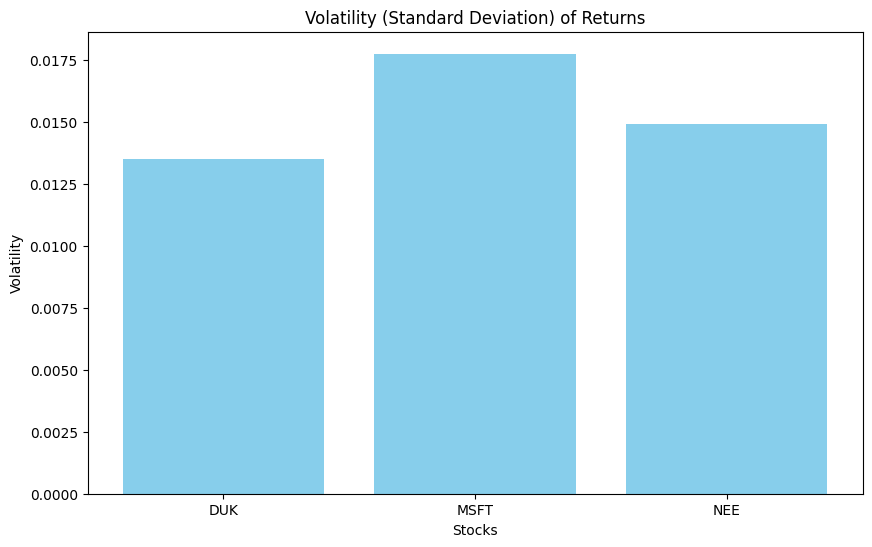

In [33]:
# Plot the standard deviation of each stock
plt.figure(figsize=(10, 6))
plt.bar(returns.columns, std_dev, color='skyblue')
plt.title("Volatility (Standard Deviation) of Returns")
plt.xlabel("Stocks")
plt.ylabel("Volatility")
plt.show()



Daily Returns:
 Ticker                          DUK      MSFT       NEE
Date                                                   
2015-01-05 00:00:00+00:00 -0.014396 -0.009196 -0.010591
2015-01-06 00:00:00+00:00  0.016417 -0.014677  0.003884
2015-01-07 00:00:00+00:00  0.003207  0.012706  0.009154
2015-01-08 00:00:00+00:00  0.004025  0.029418  0.006078
2015-01-09 00:00:00+00:00  0.001414 -0.008405 -0.008830

Covariance Matrix:
 Ticker       DUK      MSFT       NEE
Ticker                              
DUK     0.000182  0.000080  0.000150
MSFT    0.000080  0.000314  0.000114
NEE     0.000150  0.000114  0.000222

Correlation Matrix:
 Ticker       DUK      MSFT       NEE
Ticker                              
DUK     1.000000  0.334911  0.747399
MSFT    0.334911  1.000000  0.429972
NEE     0.747399  0.429972  1.000000


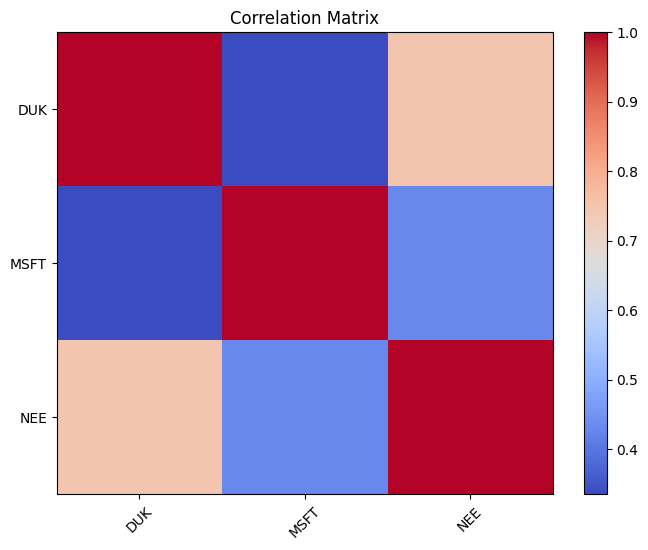

Between DUK and MSFT:
  Covariance: 0.000080
  Correlation: 0.334911
------------------------------
Between DUK and NEE:
  Covariance: 0.000150
  Correlation: 0.747399
------------------------------
Between MSFT and NEE:
  Covariance: 0.000114
  Correlation: 0.429972
------------------------------


In [30]:
'''Covariance and correlation '''

# Calculate daily percentage returns
returns = data.pct_change().dropna()
print("\nDaily Returns:\n", returns.head())

# Covariance matrix
cov_matrix = returns.cov()
print("\nCovariance Matrix:\n", cov_matrix)

# Correlation matrix
correlation_matrix = returns.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualization of Correlation Matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(tickers)), tickers, rotation=45)
plt.yticks(range(len(tickers)), tickers)
plt.title("Correlation Matrix")
plt.show()

# Pairwise analysis for covariance and correlation
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        stock_a = tickers[i]
        stock_b = tickers[j]
        cov_ab = cov_matrix.loc[stock_a, stock_b]
        corr_ab = correlation_matrix.loc[stock_a, stock_b]
        print(f"Between {stock_a} and {stock_b}:")
        print(f"  Covariance: {cov_ab:.6f}")
        print(f"  Correlation: {corr_ab:.6f}")
        print("-" * 30)


# **Markowitz Portfolio Optimization:The Mean-Variance Optimization**

In [ ]:
'''Loading data and calculating returns'''

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define stock tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2015-01-01'
end_date = '2023-01-01'

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()


[*********************100%***********************]  4 of 4 completed


In [ ]:
# Mean annualized returns
mean_returns = returns.mean() * 252  # Assuming 252 trading days in a year
print(mean_returns)

# Covariance matrix (annualized)
cov_matrix = returns.cov() * 252

print(cov_matrix)



Ticker
AAPL     0.253259
AMZN     0.267343
GOOGL    0.190592
MSFT     0.261380
dtype: float64
Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    0.089689  0.058280  0.054140  0.059808
AMZN    0.058280  0.110866  0.062284  0.062434
GOOGL   0.054140  0.062284  0.080014  0.059966
MSFT    0.059808  0.062434  0.059966  0.079246


In [ ]:
# Number of portfolio simulations
num_portfolios = 10000

# Arrays to store portfolio metrics
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    # Random portfolio weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights to sum to 1

    # Portfolio return
    portfolio_return = np.dot(weights, mean_returns)

    # Portfolio risk (standard deviation)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Store the results
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = portfolio_return / portfolio_std_dev  # Sharpe Ratio
    weights_record.append(weights)

# Convert results to a DataFrame for easier handling
results_df = pd.DataFrame(results.T, columns=['Risk', 'Return', 'Sharpe Ratio'])

print(results_df)


          Risk    Return  Sharpe Ratio
0     0.263159  0.251076      0.954085
1     0.266912  0.245259      0.918873
2     0.259513  0.245146      0.944639
3     0.262264  0.230896      0.880396
4     0.259882  0.238955      0.919474
...        ...       ...           ...
9995  0.263831  0.251486      0.953207
9996  0.263951  0.244087      0.924746
9997  0.256939  0.238145      0.926856
9998  0.257102  0.241061      0.937610
9999  0.266803  0.242664      0.909522

[10000 rows x 3 columns]


In [ ]:
# Maximum Sharpe Ratio portfolio
max_sharpe_idx = results[2].argmax()
max_sharpe_portfolio = results[:, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

# Minimum risk portfolio
min_risk_idx = results[0].argmin()
min_risk_portfolio = results[:, min_risk_idx]
min_risk_weights = weights_record[min_risk_idx]

# Display results
print("Maximum Sharpe Ratio Portfolio:")
print("Weights:", max_sharpe_weights)
print("Risk:", max_sharpe_portfolio[0])
print("Return:", max_sharpe_portfolio[1])

print("\nMinimum Risk Portfolio:")
print("Weights:", min_risk_weights)
print("Risk:", min_risk_portfolio[0])
print("Return:", min_risk_portfolio[1])


Maximum Sharpe Ratio Portfolio:
Weights: [0.31804822 0.22284246 0.00144663 0.45766268]
Risk: 0.26410786348340204
Return: 0.2600236336430294

Minimum Risk Portfolio:
Weights: [0.25914691 0.09596684 0.36044977 0.28443648]
Risk: 0.2563105483365039
Return: 0.23433222593838587


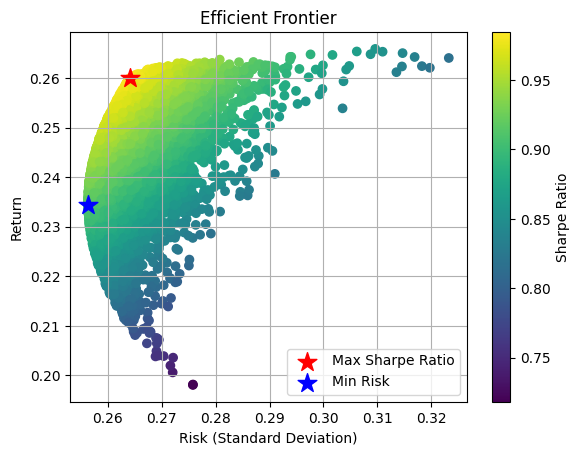

In [ ]:
# Scatter plot of portfolios
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')

# Highlight optimal portfolios
plt.scatter(max_sharpe_portfolio[0], max_sharpe_portfolio[1], color='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(min_risk_portfolio[0], min_risk_portfolio[1], color='blue', marker='*', s=200, label='Min Risk')

# Labels and legend
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid()
plt.show()


# **The Capital Asset Pricing Model (CAPM)**

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define stock ticker and market benchmark
stock_ticker = 'AAPL'
market_ticker = '^GSPC'  # S&P 500
risk_free_rate = 0.03 / 252  # Daily risk-free rate (3% annualized)

# Define date range
start_date = '2015-01-01'
end_date = '2023-01-01'

# Download adjusted close prices
data = yf.download([stock_ticker, market_ticker], start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()
stock_returns = returns[stock_ticker]
market_returns = returns[market_ticker]

print(returns)
print(stock_returns )
print(market_returns )

[*********************100%***********************]  2 of 2 completed

Ticker                         AAPL     ^GSPC
Date                                         
2015-01-05 00:00:00+00:00 -0.028172 -0.018278
2015-01-06 00:00:00+00:00  0.000094 -0.008893
2015-01-07 00:00:00+00:00  0.014022  0.011630
2015-01-08 00:00:00+00:00  0.038423  0.017888
2015-01-09 00:00:00+00:00  0.001072 -0.008404
...                             ...       ...
2022-12-23 00:00:00+00:00 -0.002798  0.005868
2022-12-27 00:00:00+00:00 -0.013878 -0.004050
2022-12-28 00:00:00+00:00 -0.030685 -0.012021
2022-12-29 00:00:00+00:00  0.028324  0.017461
2022-12-30 00:00:00+00:00  0.002469 -0.002541

[2013 rows x 2 columns]
Date
2015-01-05 00:00:00+00:00   -0.028172
2015-01-06 00:00:00+00:00    0.000094
2015-01-07 00:00:00+00:00    0.014022
2015-01-08 00:00:00+00:00    0.038423
2015-01-09 00:00:00+00:00    0.001072
                               ...   
2022-12-23 00:00:00+00:00   -0.002798
2022-12-27 00:00:00+00:00   -0.013878
2022-12-28 00:00:00+00:00   -0.030685
2022-12-29 00:00:00+00:00    0

In [ ]:
# Align stock and market returns
aligned_data = pd.concat([stock_returns, market_returns], axis=1).dropna()
stock_r = aligned_data.iloc[:, 0]
market_r = aligned_data.iloc[:, 1]

# Calculate covariance and variance
covariance = np.cov(stock_r, market_r)[0, 1]
market_variance = np.var(market_r)

# Calculate Beta
beta = covariance / market_variance
print(f"Beta of {stock_ticker}: {beta}")


Beta of AAPL: 1.2110043957669232


The CAPM formula is:

                                  E(R)=Rf+β(Rm−Rf)


-  Rf: Risk-free rate
- Rm: Market retur
- β: Stock beta

In [ ]:
# Calculate average market return (annualized)
average_market_return = market_returns.mean() * 252

# Calculate expected return
expected_return = risk_free_rate * 252 + beta * (average_market_return - risk_free_rate * 252)
print(f"Expected Return of {stock_ticker} (CAPM): {expected_return:.2f}")


Expected Return of AAPL (CAPM): 0.11


The Sharpe Ratio is:



Sharpe Ratio
= (𝑅𝑝 − 𝑅𝑓) / 𝜎𝑝
- Sharpe Ratio: A high Sharpe Ratio (>1) indicates good risk-adjusted performance.


In [ ]:
# Stock's annualized return and volatility
annualized_stock_return = stock_returns.mean() * 252
annualized_volatility = stock_returns.std() * np.sqrt(252)

# Sharpe Ratio
sharpe_ratio = (annualized_stock_return - risk_free_rate * 252) / annualized_volatility
print(f"Sharpe Ratio of {stock_ticker}: {sharpe_ratio:.2f}")


Sharpe Ratio of AAPL: 0.75


Alpha measures a portfolio manager's performance relative to the market and CAPM expectations:

           α=Rp−[Rf+β(Rm−Rf)]

 - Positive Alpha: Portfolio manager is outperforming the market-adjusted expected return.
 - Negative Alpha: Portfolio manager is underperforming relative to the market-adjusted expected return.



In [ ]:
# Portfolio actual return
portfolio_return = annualized_stock_return

# Calculate alpha
alpha = portfolio_return - (risk_free_rate * 252 + beta * (average_market_return - risk_free_rate * 252))
print(f"Alpha of {stock_ticker}: {alpha:.2f}")


Alpha of AAPL: 0.14


# **Monte Carlo Simulation**

Monte Carlo Simulation is a powerful decision-making tool in corporate finance that uses randomness to model uncertainty and estimate outcomes. Below are practical examples of applying Monte Carlo Simulation in corporate finance for predicting gross profit and forecasting stock prices.

Gross profit depends on Revenue and Cost of Goods Sold (COGS). Both factors are often uncertain and can be modeled using probability distributions.


Expected Gross Profit: $249,848.94
Gross Profit Standard Deviation: $32,014.60


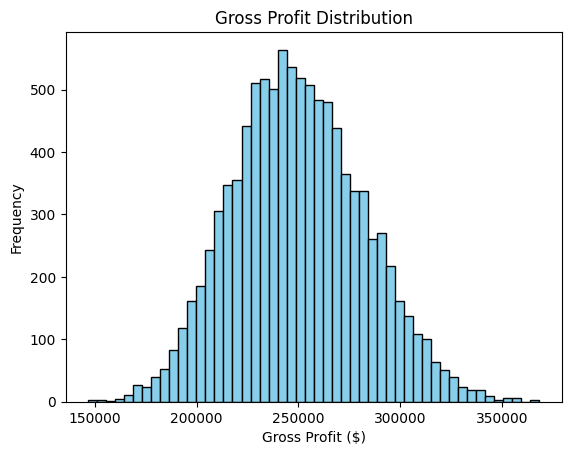

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for simulation (based on historical data)
revenue_mean = 500000  # Mean revenue
revenue_std = 50000    # Revenue standard deviation
cogs_low = 0.4         # Minimum COGS as % of revenue
cogs_mode = 0.5        # Most likely COGS as % of revenue
cogs_high = 0.6        # Maximum COGS as % of revenue

# Number of simulations
n_simulations = 10000

# Monte Carlo Simulation
revenues = np.random.normal(revenue_mean, revenue_std, n_simulations)
cogs_percentages = np.random.triangular(cogs_low, cogs_mode, cogs_high, n_simulations)
cogs = revenues * cogs_percentages
gross_profits = revenues - cogs

# Results
print(f"Expected Gross Profit: ${np.mean(gross_profits):,.2f}")
print(f"Gross Profit Standard Deviation: ${np.std(gross_profits):,.2f}")


plt.hist(gross_profits, bins=50, color='skyblue', edgecolor='black')
plt.title('Gross Profit Distribution')
plt.xlabel('Gross Profit ($)')
plt.ylabel('Frequency')
plt.show()



- The Monte Carlo simulation predicts an expected gross profit of 249.849,  with a standard deviation of 32,015, indicating potential variability in outcomes. The distribution shows a normal pattern, with most values concentrated between 220,000 and 280,000, and less frequent extreme values. This analysis highlights a 68% probability of gross profit falling within 217,835–$281,863 and helps the company assess financial risk, plan for uncertainties, and develop strategies for managing deviations from expected profits.

## Monte Carlo Simulation for Forecasting Stock Prices


Stock price forecasting can use Monte Carlo Simulation to model future price movements based on:
- Historical volatility.
- Expected drift (average return).

Expected Final Stock Price: $111.50
Stock Price Standard Deviation: $21.58


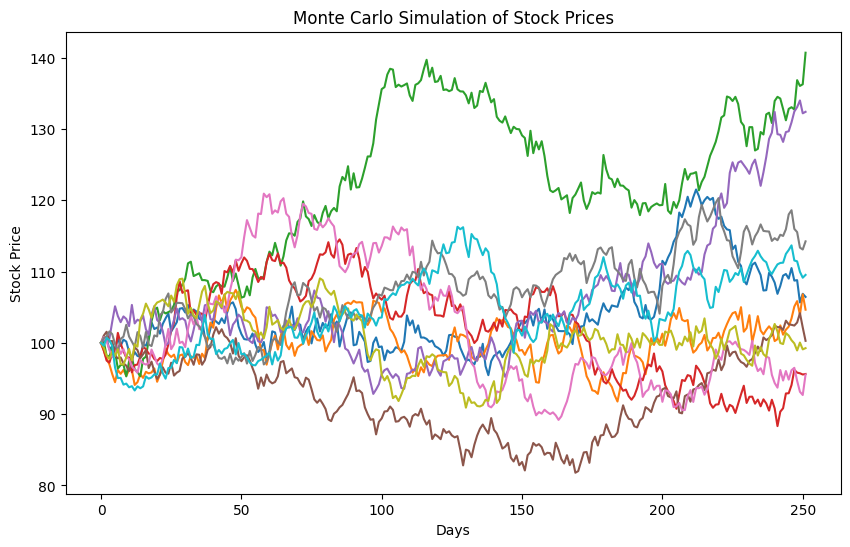

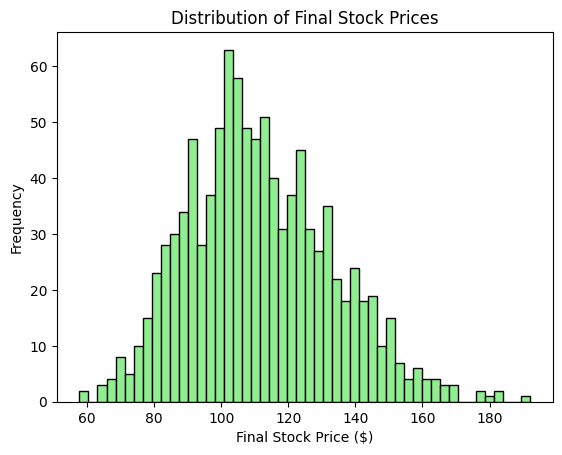

In [ ]:
# Parameters for simulation
S0 = 100  # Current stock price
mu = 0.1  # Annual expected return (10%)
sigma = 0.2  # Annual volatility (20%)
T = 1  # Time horizon (1 year)
n_simulations = 1000  # Number of simulations
n_steps = 252  # Number of trading days in a year

# Monte Carlo Simulation
dt = T / n_steps  # Time step
price_paths = np.zeros((n_steps, n_simulations))
price_paths[0] = S0

for t in range(1, n_steps):
    Z = np.random.standard_normal(n_simulations)
    price_paths[t] = price_paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z * np.sqrt(dt))

# Results
final_prices = price_paths[-1]
print(f"Expected Final Stock Price: ${np.mean(final_prices):.2f}")
print(f"Stock Price Standard Deviation: ${np.std(final_prices):.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(price_paths[:, :10])  # Plot first 10 paths for visualization
plt.title('Monte Carlo Simulation of Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

# Histogram of final prices
plt.hist(final_prices, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Final Stock Prices')
plt.xlabel('Final Stock Price ($)')
plt.ylabel('Frequency')
plt.show()


- The distribution of final stock prices highlights the uncertainty of future prices.
- It helps in risk assessment, option pricing, or evaluating investment strategies.

- The Expected Final Stock Price (111.50) represents the average stock price at the end of the simulation period based on 10,000 simulated paths. It is calculated as the mean of all simulated stock prices. This value suggests that, under the assumptions made about the stock’s drift (expected return) and volatility, the average price at the end of the simulation is expected to be $111.50. Therefore Investors can consider this as a central estimate of the stock’s future price.

- Stock Price Standard Deviation (21.58) measures the volatility of the simulated stock prices. It quantifies the spread of the prices around the expected final stock price (111.50). A higher standard deviation indicates greater uncertainty in the stock price prediction. In this case, the range of possible final prices is relatively wide, suggesting moderate risk